In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
file_path = "Housing.csv"
sample = df = pd.read_csv(file_path)

In [30]:
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'];

X = sample[inputs].values
Y = sample.values[:, 0]; #Price

In [31]:
m = len(Y)
X_0 = np.ones((m, 1))
X = np.hstack((X_0, X))
theta = np.zeros(X.shape[1])

In [32]:
scaler = MinMaxScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

In [33]:
# defining function for computing the cost for linear regression
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [34]:
# defining function for gradient descent algorithm
def gradient_descent(Xt, Yt, Xv, Yv, theta, alpha, iterations, lam=0.1):
  train_cost_history = np.zeros(iterations)
  valid_cost_history = np.zeros(iterations)
  m = len(Yt)
  for i in range(iterations):
    predictions = Xt.dot(theta)
    errors = np.subtract(predictions, Yt)
    sum_delta = (alpha / m) * Xt.transpose().dot(errors)
    sum_delta[1:] += (lam/m) * theta[1:]
    theta = theta - sum_delta
    train_cost_history[i] = compute_cost(Xt, Yt, theta)
    valid_cost_history[i] = compute_cost(Xv, Yv, theta)
  return theta, train_cost_history, valid_cost_history


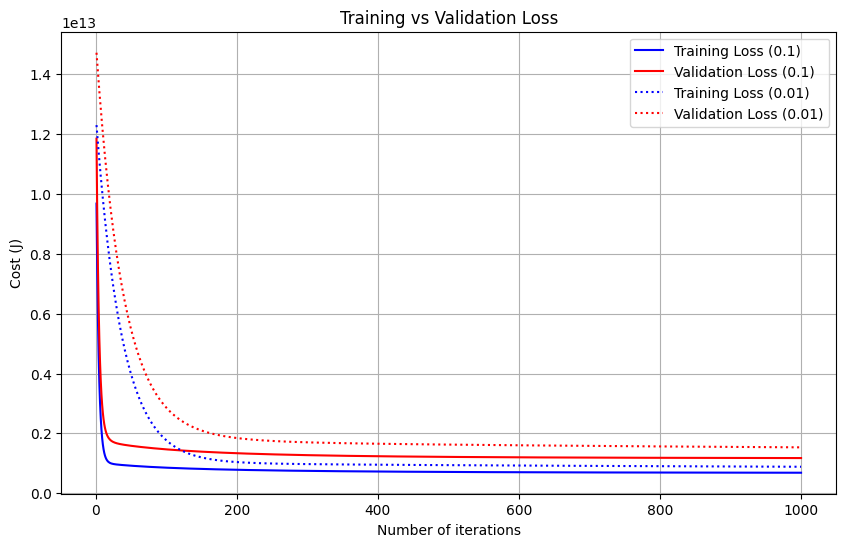


Best Model Parameters (Theta) for Problem 3B - Normalized + Penalty: Learning Rate = 0.1

         X_0: 2,453,287.19
        area: 3,755,215.55
    bedrooms: 1,081,915.17
   bathrooms: 3,023,716.08
     stories: 1,494,202.40
     parking: 1,170,691.80


In [35]:
theta = np.zeros(X.shape[1])
iterations = 1000

alpha = 0.1
theta_1, train_cost_history_1, valid_cost_history_1  = gradient_descent(X_train, Y_train, X_test, Y_test, theta, alpha, iterations) # 0.1 Learning Rate

alpha = 0.01
theta_2, train_cost_history_2, valid_cost_history_2  = gradient_descent(X_train, Y_train, X_test, Y_test, theta, alpha, iterations) # 0.01 Learning Rate

plt.plot(range(1, iterations+1), train_cost_history_1, color='blue', label='Training Loss (0.1)')
plt.plot(range(1, iterations+1), valid_cost_history_1, color='red', label='Validation Loss (0.1)')
plt.plot(range(1, iterations+1), train_cost_history_2, color='blue', linestyle='dotted', label='Training Loss (0.01)')
plt.plot(range(1, iterations+1), valid_cost_history_2, color='red', linestyle='dotted', label='Validation Loss (0.01)')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

features = ['X_0', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

print("\nBest Model Parameters (Theta) for Problem 3B - Normalized + Penalty: Learning Rate = 0.1\n")
theta_list = theta_1.flatten()
for label, value in zip(features, theta_list):
    print(f"{label:>12}: {value:,.2f}")